# DATA INFO

This is the data provided by the psychology department 

# Data cleaning

In [3]:
import os
import pandas as pd 

In [4]:
list_files = os.listdir()
list_files = [csv for csv in list_files if "Protocoles" in csv]

In [5]:
list_files

['Protocoles Rorschach (RorschIA) - Abel.csv',
 'Protocoles Rorschach (RorschIA) - Egger.csv',
 'Protocoles Rorschach (RorschIA) - Francis.csv',
 'Protocoles Rorschach (RorschIA) - Jolivalt.csv',
 'Protocoles Rorschach (RorschIA) - Mme B.csv',
 'Protocoles Rorschach (RorschIA) - Mme L.csv',
 'Protocoles Rorschach (RorschIA) - Mme T.csv',
 'Protocoles Rorschach (RorschIA) - Piraud.csv',
 'Protocoles Rorschach (RorschIA) - Rosa.csv',
 'Protocoles Rorschach (RorschIA) - Sara.csv']

In [6]:
nancy_df = pd.DataFrame()

In [7]:
for data in list_files:
    df = pd.read_csv(data)
    nancy_df = pd.concat([nancy_df, df])

In [8]:
nancy_df.index

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
       ...
       41, 42, 43, 44, 45, 46, 47, 48, 49, 50],
      dtype='int64', length=567)

In [9]:
nancy_df.shape

(567, 20)

In [10]:
nancy_df.columns

Index(['Pl', 'Numéros réponse', 'Position', 'Réponse (French)',
       'Answer (English)', 'Enquête (French)', 'Inquiry (English)',
       'Localisation', 'Déterminant', 'Contenu', '4e colonne', 'LOC', 'DET',
       'CON', 'QUAL', 'Unnamed: 11', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10'],
      dtype='object')

We can see that Localisation, Determinant and Contenu are formated in two different columns

In [11]:
nancy_df["QUAL"].notna().sum()

84

In [12]:
# nancy_df['Réponse (French)']

In [13]:
cols_drop = ['Pl', 'Numéros réponse', 'Position',
            'Enquête (French)', 'Inquiry (English)',
            'Localisation', '4e colonne',
            'LOC', 'QUAL',
            'Unnamed: 11', 'Unnamed: 7', 
            'Unnamed: 8', 'Unnamed: 9',
            'Unnamed: 10']

In [14]:
nancy_df.drop(cols_drop, axis=1, inplace=True)

In [15]:
nancy_df["Déterminant"] = nancy_df[["Déterminant", "DET"]].bfill(axis=1).iloc[:,0]
nancy_df["Contenu"] = nancy_df[["Contenu", "CON"]].bfill(axis=1).iloc[:,0]

In [16]:
nancy_df.drop(["DET", "CON"], axis = 1, inplace=True)

There are responses that were not translated

In [17]:
nancy_df[(nancy_df["Answer (English)"].isna()) & (nancy_df["Réponse (French)"].notna())]

,Réponse (French),Answer (English),Déterminant,Contenu
51,"Argh en plus on peut\n même faire un éléphant,...",NaN,F-,A
52,Ça peut être des chevaux\n aussi,NaN,F-,A
53,"Mais un peu sur la même\n logique, en fait, je...",NaN,F-,(A)
54,Et là dans le sens-là (me\n montre la planche ...,NaN,FC’E+,H / Vêt
55,"Mais en fait, sur le\n principe ça me fait plu...",NaN,kobC’E-,Frag / Art
56,"Et aussi un éléphant, avec\n les yeux, la trom...",NaN,F+,A
57,"Et alors comme ça, ça\n fait vachement penser ...",NaN,kob -,Elem
58,T’as une petite île où t’as\n plein de fumée q...,NaN,kobE-,Pays/ Elem
59,"Et maintenant que j’ai vu\n ça, de l’autre côt...",NaN,kob-,Elem
60,"Ça me fait penser à un\n voilier aussi, mais a...",NaN,FC’-,Obj


In [18]:
to_translate = nancy_df[(nancy_df["Answer (English)"].isna()) & (nancy_df["Réponse (French)"].notna())]

In [19]:
with open(r"..\DEEPL_KEY\DEEPL_API_KEY.txt", "r") as f:
    API_KEY = f.read().strip("\n")

In [20]:
import deepl

def translate_text(text):
    
    translator = deepl.Translator(API_KEY)
    result = translator.translate_text(text, target_lang="EN-US", preserve_formatting=True)
    return result

In [21]:
to_translate["Answer (English)"] = to_translate["Réponse (French)"].apply(translate_text)

KeyboardInterrupt: 

In [ ]:
nancy_df = pd.concat([nancy_df.reset_index(drop=True), to_translate.reset_index(drop=True)], axis=0)

In [ ]:
nancy_df.dropna(inplace=True)

In [ ]:
# def clean_new_lines_text(text):
#     text = text.replace("\n", " ")
#     return text

In [ ]:
nancy_df

,Réponse (French),Answer (English),Déterminant,Contenu
0,Moi ça me fait penser à un papillon de nuit a...,It reminds me of a moth with mandibles. It lo...,FC'+,(A)
1,"Une personne de chaque côté (forcément, c’est ...","One person on each side (obviously, it’s symme...",K+,H
2,Une casserole sur une gazinière de… de camping...,A saucepan on a…camping gas stove. The gas sto...,FE-,Obj
5,Ah deux lapins qui se tapent la main avec les ...,Ah two rabbits hitting each other's hands with...,kan,A
6,"Et… Une personne avec des grosses lèvres, ses ...","And... A person with big lips, his eyes, his e...",EF,Hd
...,...,...,...,...
35,"Tu vois ça, ça me fait\n penser à des crevette...","You see that, it reminds me\n reminds me of sh...",CF-,Alim
36,"J’arrive vraiment pas à\n voir l’ensemble, ça,...","I really can't\n see the whole thing, it makes...",FC +,A / Alim
37,"C’est un peu capillotracté\n un peu après, mai...","It's a bit capillotint\n a bit afterwards, but...",kobE-,Pays / arch\n / Elem /\n Frag
38,": Là ça me fait penser à une\n chèvre (rires),...",": It reminds me of a goat\n goat (laughs), and...",FC’-,A


In [ ]:
# nancy_df["Answer (English)"] = nancy_df["Answer (English)"].apply(clean_new_lines_text)
# nancy_df["Réponse (French)"] = nancy_df["Réponse (French)"].apply(clean_new_lines_text)

In [ ]:
nancy_df.to_csv("Nancy_clean.csv", index=False)

# Boolean features from determinants and contents labels

In [71]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import re

nancy_df = pd.read_csv("Nancy_clean.csv")

In [72]:
nancy_contents = nancy_df[["Réponse (French)", "Answer (English)", "Contenu"]]
nancy_determinants = nancy_df[["Réponse (French)", "Answer (English)", "Déterminant"]]

### Content labels

In [73]:
nancy_contents["Contenu"].value_counts()

Contenu
A                   85
Hd                  32
Ad                  29
Obj                 23
Anat                14
                    ..
H/Obj/Vet            1
(Hd)/Symb            1
A/Frag/sg            1
H/Hd                 1
H / Nat\n /Scène     1
Name: count, Length: 109, dtype: int64

In [74]:
labels = nancy_contents["Contenu"].str.replace("\n", "")
nancy_contents["Contenu"] = labels
# nancy_contents

C:\Users\alber\AppData\Local\Temp\ipykernel_16032\4195384464.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nancy_contents["Contenu"] = labels


In [75]:
splits = []

In [76]:
def split_labels(text, splits):
    text = str(text).lower().replace(" ", "").replace("\r", "").replace("vet", "vêt").replace("geo", "géo").replace("henf", "h").replace("explosion", "sc").replace("aenf", "a").replace("scen", "scène").replace("squel", "anat").replace("symb", "abs").replace("hbarré", "h")
    
    regex = r" |/"
    labels = re.split(regex, text)
    filter_characters = ["", "+", "-", "\\", "+-", "+/-", "stat"]   # i am filtering the good and bad form
    labels = [label.upper() for label in labels if label not in filter_characters]
    splits.append(labels)
    
    return labels

In [77]:
labels_contents = nancy_contents["Contenu"].apply(lambda x: split_labels(x, splits))

In [78]:
labels_contents

0                         [(A)]
1                           [H]
2                         [OBJ]
3                           [A]
4                          [HD]
                 ...           
375                      [ALIM]
376                   [A, ALIM]
377    [PAYS, ARCH, ELEM, FRAG]
378                         [A]
379             [H, NAT, SCÈNE]
Name: Contenu, Length: 380, dtype: object

In [79]:
labels_contents = labels_contents.str.join('|').str.get_dummies()

In [80]:
labels_contents.columns

Index(['(A)', '(AD)', '(H)', '(HD)', 'A', 'ABS', 'AD', 'ALIM', 'ANAT', 'ARCH',
       'ART', 'BOT', 'ELEM', 'FRAG', 'GÉO', 'H', 'HD', 'MQ', 'NAT', 'OBJ',
       'PAYS', 'RADIO', 'SC', 'SCÈNE', 'SEX', 'SG', 'VÊT'],
      dtype='object')

aenf not in bible, explosion not in bible, henf not in bible

Aenf seems to be just A.

Explosion could be SC.

Hbarré

Scen =? Scène

squel = skeleton  = anat?

symb = symbolic meanings about death? - chnaged to abs


#### Resolving the ambiguities

Corrected in the .replace() of the function

In [81]:
nancy_contents[nancy_contents["Contenu"].str.contains("Aenf")]

,Réponse (French),Answer (English),Contenu
293,"Non c’est pas des cochons… un sorte de lapin, ...","No, it's not pigs... a kind of rabbit, no, don...",Aenf


In [82]:
# nancy_contents.iloc[293]["Answer (English)"] 

In [83]:
# nancy_contents[nancy_contents["Contenu"].str.contains("Explosion")]
# nancy_contents.iloc[337]["Answer (English)"] #could be sc

In [84]:
# nancy_contents[nancy_contents["Contenu"].str.contains("Henf")]
# nancy_contents.iloc[23]["Answer (English)"] # seems like just H 

In [85]:
# nancy_contents[nancy_contents["Contenu"].str.contains("Henf")]
# nancy_contents.iloc[284]["Answer (English)"] # seems like just H 

In [86]:
# nancy_contents[nancy_contents["Contenu"].str.contains("Squel")]
# # nancy_contents.iloc[353]["Answer (English)"] #Anat?
# # nancy_contents.iloc[53]["Answer (English)"]

In [87]:
# nancy_contents[nancy_contents["Contenu"].str.contains("Symb")]
# nancy_contents.iloc[150]["Answer (English)"] #Anat?
# nancy_contents.iloc[269]["Answer (English)"]
# nancy_contents.iloc[272]["Answer (English)"]
# nancy_contents.iloc[279]["Answer (English)"]

In [88]:
labels_contents.shape

(380, 27)

In [89]:
nancy_contents = pd.concat([nancy_contents, labels_contents], axis=1)
nancy_contents

,Réponse (French),Answer (English),Contenu,(A),(AD),(H),(HD),A,ABS,AD,...,MQ,NAT,OBJ,PAYS,RADIO,SC,SCÈNE,SEX,SG,VÊT
0,Moi ça me fait penser à un papillon de nuit a...,It reminds me of a moth with mandibles. It lo...,(A),1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Une personne de chaque côté (forcément, c’est ...","One person on each side (obviously, it’s symme...",H,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Une casserole sur une gazinière de… de camping...,A saucepan on a…camping gas stove. The gas sto...,Obj,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,Ah deux lapins qui se tapent la main avec les ...,Ah two rabbits hitting each other's hands with...,A,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Et… Une personne avec des grosses lèvres, ses ...","And... A person with big lips, his eyes, his e...",Hd,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,"Tu vois ça, ça me fait\n penser à des crevette...","You see that, it reminds me\n reminds me of sh...",Alim,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
376,"J’arrive vraiment pas à\n voir l’ensemble, ça,...","I really can't\n see the whole thing, it makes...",A / Alim,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
377,"C’est un peu capillotracté\n un peu après, mai...","It's a bit capillotint\n a bit afterwards, but...",Pays / arch / Elem / Frag,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
378,": Là ça me fait penser à une\n chèvre (rires),...",": It reminds me of a goat\n goat (laughs), and...",A,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [90]:
nancy_contents.to_csv("nancy_contents.csv", index = False)

### Determinant labels

In [91]:
nancy_determinants["Déterminant"].value_counts()

Déterminant
F-        82
F+        55
FC-       12
FC’-       8
F+/-       8
          ..
Fclob-     1
Kclob-     1
EF+/-      1
F- C       1
KE-        1
Name: count, Length: 114, dtype: int64

In [92]:
ex = "KobE C'-"

In [93]:
splits = []

Important! I am taking away tge +- for now to make the splits easier

In [94]:
def split_labels(text,splits):
    text = str(text).replace(" ", "").replace("\r", "").replace("\n", "").replace("'", "'").replace("’", "'").replace("+", "").replace("-", "").replace("\\", "").replace("/", "").lower()
    # regex either one uppercase letter or a couple of lower case letters
    # + and - symbols
    # ' character

    regex = r"( |fclob|clobf|clob|kob|kan|kp|k|fc'|c'f|cf'|cf|fc|fe|ef|e)"
    labels = re.split(regex, text)
    filter_characters = ["", "+", "-", "\\", "+-", "+/-", "stat"]   # i am filtering the good and bad form
    labels = [label.upper() for label in labels if label not in filter_characters]
    splits.append(labels)
    return labels

In [95]:
split_labels(ex, splits) # we would get a positive class in each of these labels

['KOB', 'E', "C'"]

In [96]:
labels_determinants = nancy_determinants["Déterminant"].apply(lambda x: split_labels(x, splits))
labels_determinants

0         [FC']
1           [K]
2          [FE]
3         [KAN]
4          [EF]
         ...   
375        [CF]
376        [FC]
377    [KOB, E]
378       [FC']
379      [K, E]
Name: Déterminant, Length: 380, dtype: object

In [97]:
labels_determinants = labels_determinants.str.join('|').str.get_dummies()

In [98]:
labels_determinants.columns

Index(['C', 'C'', 'C'F', 'CF', 'CF'', 'CLOB', 'CLOBF', 'E', 'EF', 'F', 'FC',
       'FC'', 'FCLOB', 'FE', 'K', 'KAN', 'KOB', 'KP'],
      dtype='object')

In [99]:
for l in splits:
    if "'" in l:
        print(l)

In [100]:
nancy_determinants[nancy_determinants["Déterminant"].str.contains("CF'")]

,Réponse (French),Answer (English),Déterminant
243,Une tache d'encre non de sang... ouais,An ink stain not blood...yeah,CF'
271,Hm … Je sais pas … ça m’angoisse un peu … l’im...,Hm... I don't know... it worries me a little.....,CF'


In [101]:
nancy_determinants = pd.concat([nancy_determinants, labels_determinants], axis=1)
nancy_determinants

,Réponse (French),Answer (English),Déterminant,C,C',C'F,CF,CF',CLOB,CLOBF,...,EF,F,FC,FC',FCLOB,FE,K,KAN,KOB,KP
0,Moi ça me fait penser à un papillon de nuit a...,It reminds me of a moth with mandibles. It lo...,FC'+,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,"Une personne de chaque côté (forcément, c’est ...","One person on each side (obviously, it’s symme...",K+,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,Une casserole sur une gazinière de… de camping...,A saucepan on a…camping gas stove. The gas sto...,FE-,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,Ah deux lapins qui se tapent la main avec les ...,Ah two rabbits hitting each other's hands with...,kan,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,"Et… Une personne avec des grosses lèvres, ses ...","And... A person with big lips, his eyes, his e...",EF,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,"Tu vois ça, ça me fait\n penser à des crevette...","You see that, it reminds me\n reminds me of sh...",CF-,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
376,"J’arrive vraiment pas à\n voir l’ensemble, ça,...","I really can't\n see the whole thing, it makes...",FC +,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
377,"C’est un peu capillotracté\n un peu après, mai...","It's a bit capillotint\n a bit afterwards, but...",kobE-,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
378,": Là ça me fait penser à une\n chèvre (rires),...",": It reminds me of a goat\n goat (laughs), and...",FC’-,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [102]:
nancy_determinants.to_csv("nancy_determinants.csv", index = False)

# Content labels distribution

In [103]:
labels_contents

,(A),(AD),(H),(HD),A,ABS,AD,ALIM,ANAT,ARCH,...,MQ,NAT,OBJ,PAYS,RADIO,SC,SCÈNE,SEX,SG,VÊT
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
376,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
377,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
378,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [104]:
agg_dict_content = {}
total = 0
for label in labels_contents.columns:
    total_label = sum(labels_contents[label])
    total = total + total_label
    agg_dict_content[label] = total_label
agg_dict_content["total"] = total
agg_dict_content

{'(A)': 12,
 '(AD)': 5,
 '(H)': 18,
 '(HD)': 7,
 'A': 111,
 'ABS': 18,
 'AD': 46,
 'ALIM': 6,
 'ANAT': 21,
 'ARCH': 8,
 'ART': 4,
 'BOT': 19,
 'ELEM': 23,
 'FRAG': 23,
 'GÉO': 2,
 'H': 36,
 'HD': 46,
 'MQ': 4,
 'NAT': 8,
 'OBJ': 42,
 'PAYS': 18,
 'RADIO': 1,
 'SC': 1,
 'SCÈNE': 3,
 'SEX': 7,
 'SG': 12,
 'VÊT': 13,
 'total': 514}

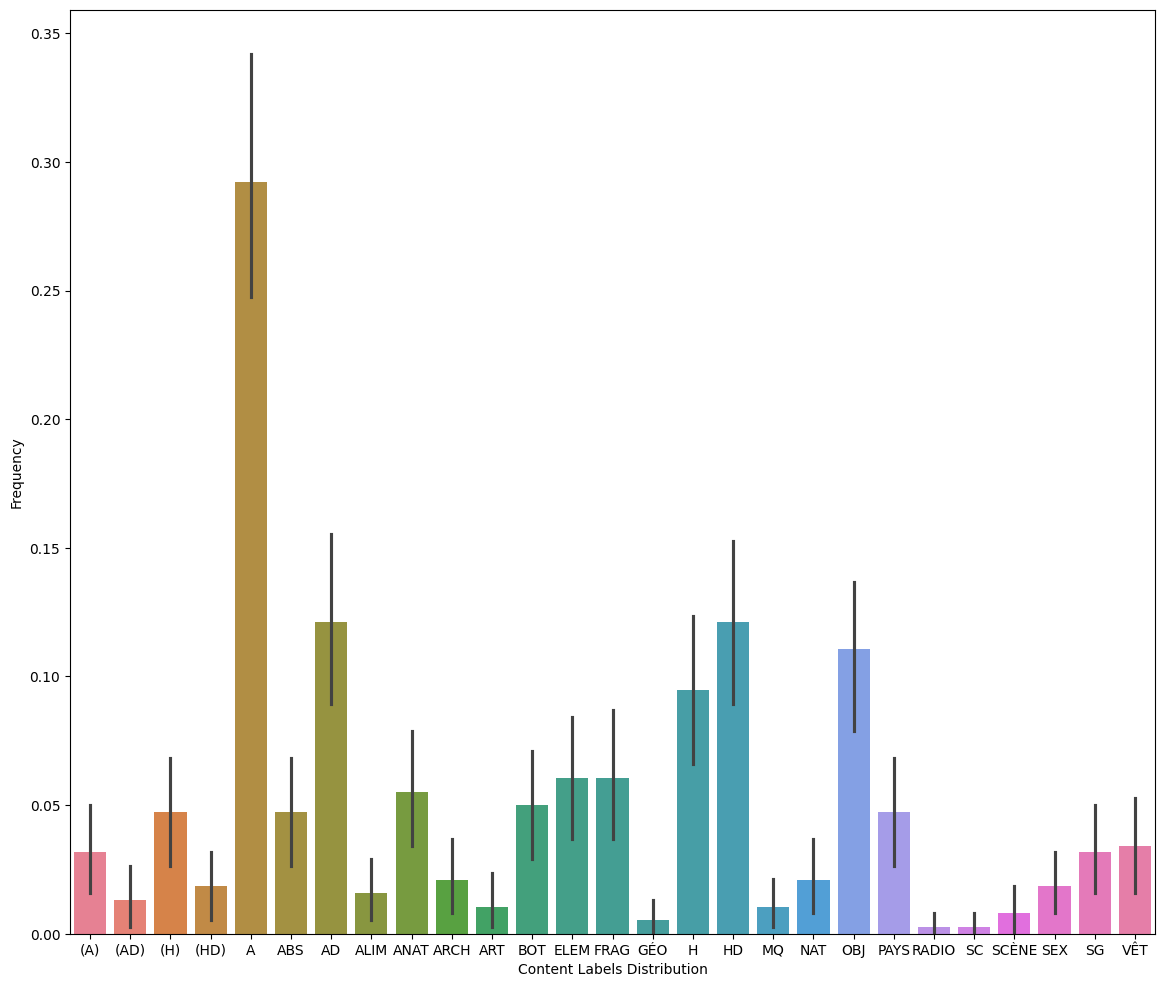

In [105]:
fig, ax = plt.subplots(figsize=(14,12))
sns.barplot(data=labels_contents)
ax.set_xlabel("Content Labels Distribution")
ax.set_ylabel("Frequency")
plt.show()

# Determinant labels distribution

In [106]:
agg_dict_determinants = {}
total = 0
for label in labels_determinants.columns:
    total_label = sum(labels_determinants[label])
    total = total + total_label
    agg_dict_determinants[label] = total_label
agg_dict_determinants["total"] = total
agg_dict_determinants

{'C': 37,
 "C'": 24,
 "C'F": 3,
 'CF': 16,
 "CF'": 2,
 'CLOB': 16,
 'CLOBF': 4,
 'E': 28,
 'EF': 6,
 'F': 150,
 'FC': 33,
 "FC'": 23,
 'FCLOB': 5,
 'FE': 8,
 'K': 44,
 'KAN': 34,
 'KOB': 23,
 'KP': 14,
 'total': 470}

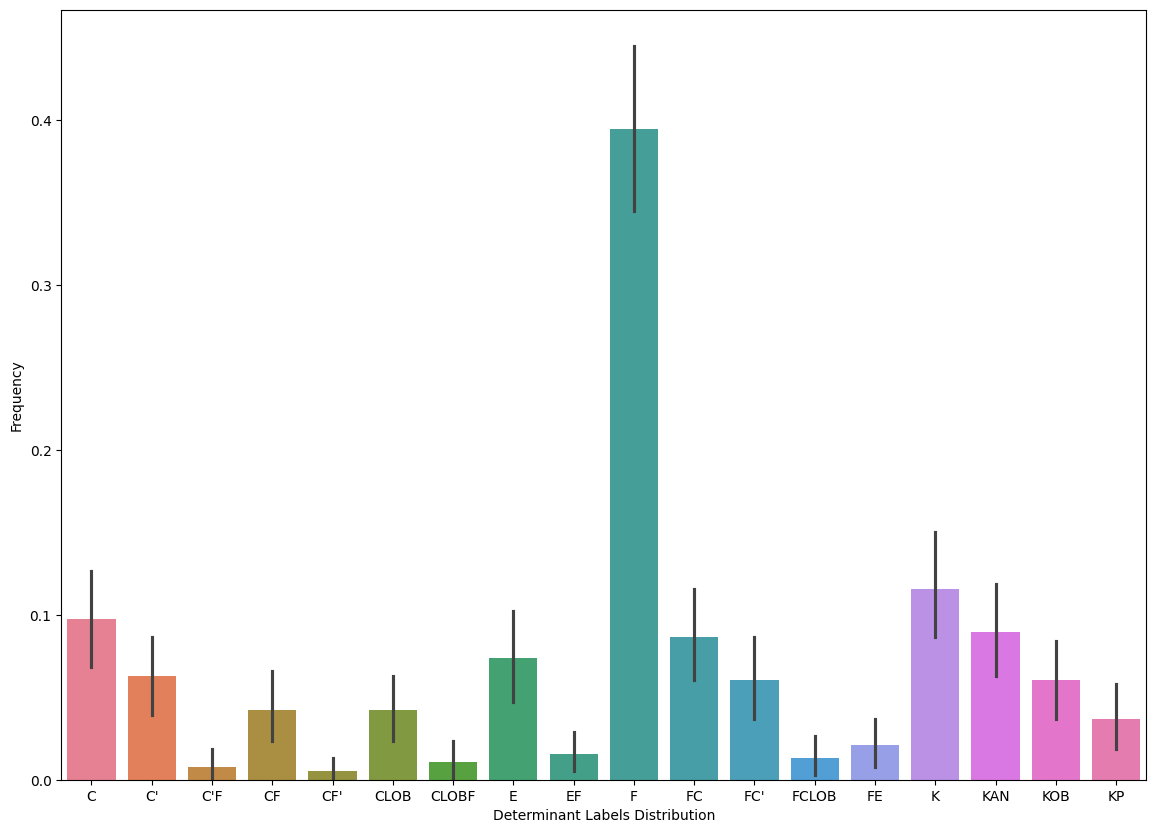

In [107]:
fig, ax = plt.subplots(figsize=(14,10))
sns.barplot(data=labels_determinants)
ax.set_xlabel("Determinant Labels Distribution")
ax.set_ylabel("Frequency")
plt.show()

# Grouping labels in their larger groups

## Determinants

In [108]:
groups_determinants = [("kinesthetics", ["K", "KAN", "KOB", "KP"]),
                        ("form", ["F"]),
                        ("color", ["FC", "CF", "C", "FC'", "CF'", "C'F", "F'C", "C'"]),
                        ("fading", ["FE", "EF", "E"]),
                        ("threat", ["FCLOB", "CLOBF", "CLOB"])]

In [109]:
agg_dict_new_dets = {tuple[0]: 0 for tuple in groups_determinants}
for key in agg_dict_determinants.keys():
    for tuple_cats in groups_determinants:
        if key in tuple_cats[1]:
            agg_dict_new_dets[tuple_cats[0]] = agg_dict_new_dets[tuple_cats[0]] + agg_dict_determinants[key]
agg_dict_new_dets           

{'kinesthetics': 115, 'form': 150, 'color': 138, 'fading': 42, 'threat': 25}

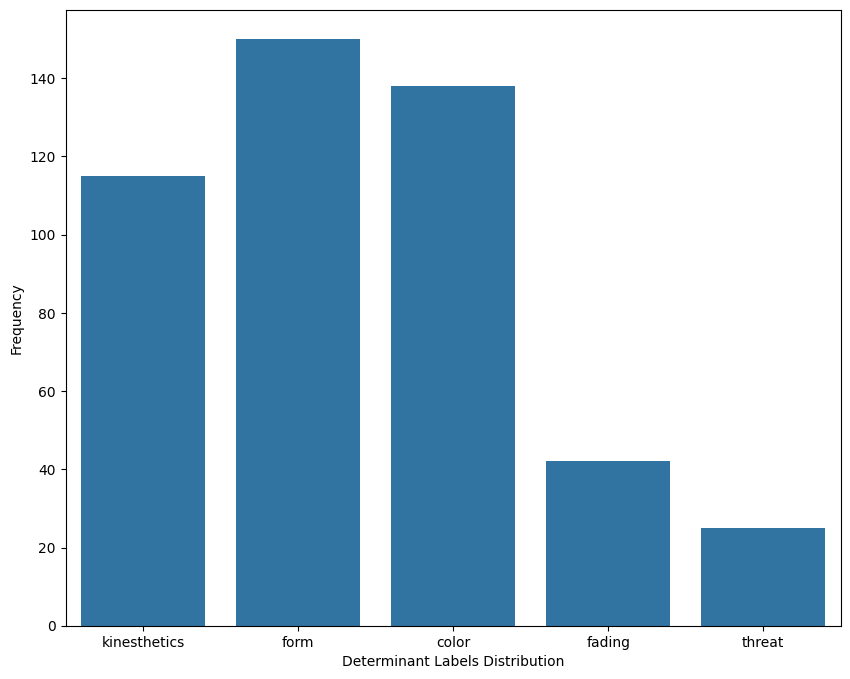

In [110]:
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(data=agg_dict_new_dets)
ax.set_xlabel("Determinant Labels Distribution")
ax.set_ylabel("Frequency")
plt.show()

## Contents

In [111]:
groups_contents = [("animal", ["(A)", "(AD)", "A", "AD", "ANAT"]),
                    ("human", ["(H)", "(HD)", "ANAT", "H", "HD"]),
                    ("abs", ["ABS", "SYMB"]),
                    ("food", ["ALIM"]),
                    ("art_arch", ["ARCH", "ART", "SCÈNE"]),
                    ("nature", ["BOT", "ELEM", "PAYS", "NAT"]),
                    ("fragment", ["FRAG"]),
                    ("geo", ["GÉO"]),
                    ("hybrid", ["H/A", "H/AD"]),
                    ("object", ["MQ", "OBJ", "VÊT"]),
                    ("science", ["RADIO", "SC"]),
                    ("graphic", ["SEX", "SG"])]

In [112]:
agg_dict_new_contents = {tuple[0]: 0 for tuple in groups_contents}
for key in agg_dict_content.keys():
    for tuple_cats in groups_contents:
        if key in tuple_cats[1]:
            agg_dict_new_contents[tuple_cats[0]] = agg_dict_new_contents[tuple_cats[0]] + agg_dict_content[key]
agg_dict_new_contents

{'animal': 195,
 'human': 128,
 'abs': 18,
 'food': 6,
 'art_arch': 15,
 'nature': 68,
 'fragment': 23,
 'geo': 2,
 'hybrid': 0,
 'object': 59,
 'science': 2,
 'graphic': 19}

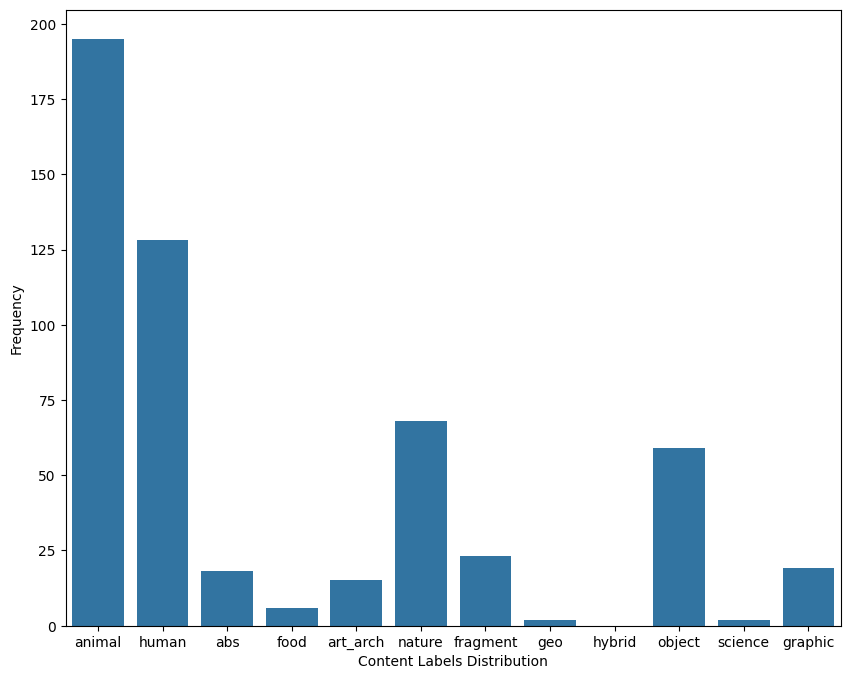

In [113]:
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(data=agg_dict_new_contents)
ax.set_xlabel("Content Labels Distribution")
ax.set_ylabel("Frequency")
plt.show()

# New labels

### Determinants

In [114]:
def rename_cols(df):
    for col in df:
        for tuple_cats in groups_determinants:
            if col in tuple_cats[1]:
                df = df.rename(columns={col:tuple_cats[0]})
    for col in df:
        for tuple_cats in groups_contents:
            if col in tuple_cats[1]:
                df = df.rename(columns={col:tuple_cats[0]})
    return df

In [115]:
labels_determinants = rename_cols(labels_determinants)
labels_contents = rename_cols(labels_contents)

In [116]:
list_cols_dets = list(labels_determinants.columns)
len(list_cols_dets)

18

In [117]:
# list_cols_dets

In [118]:
indexes_dets = {}
i = 0
while i < len(list_cols_dets):
    item = list_cols_dets[i]
    if item not in indexes_dets.keys():
        indexes_dets[item] = [i]
    else:
        indexes_dets[item].append(i)
    i = i + 1
indexes_dets

{'color': [0, 1, 2, 3, 4, 10, 11],
 'threat': [5, 6, 12],
 'fading': [7, 8, 13],
 'form': [9],
 'kinesthetics': [14, 15, 16, 17]}

In [119]:
labels_determinants.iloc[:, 2].value_counts()

color
0    377
1      3
Name: count, dtype: int64

Checking that the sum would work. Bare in mind the columns are exclusive in this way so we should get 0 and 1 values

In [120]:
# labels_determinants.iloc[:, indexes_dets["color"]].sum(axis=1).value_counts()

In [121]:
# (labels_determinants.iloc[:, 0].sum(axis=1)).value_counts()

In [122]:
labels_determinants["color_sum"] = labels_determinants.iloc[:, indexes_dets["color"]].sum(axis=1)
labels_determinants["threat_sum"] = labels_determinants.iloc[:, indexes_dets["threat"]].sum(axis=1)
labels_determinants["fading_sum"] = labels_determinants.iloc[:, indexes_dets["fading"]].sum(axis=1)
labels_determinants["form_sum"] = labels_determinants.iloc[:, indexes_dets["form"]].sum(axis=1)
labels_determinants["kinesthetics_sum"] = labels_determinants.iloc[:, indexes_dets["kinesthetics"]].sum(axis=1)

In [123]:
new_labels_determinants = labels_determinants[["color_sum", "threat_sum", "fading_sum","form_sum","kinesthetics_sum"]]

In [124]:
nancy_determinants = pd.concat([nancy_determinants, new_labels_determinants], axis=1)

In [125]:
# nancy_determinants

In [126]:
nancy_determinants.to_csv("nancy_determinants_grouped.csv", index = False)

### Contents

In [127]:
list_cols_contents = list(labels_contents.columns)
len(list_cols_contents)

27

In [128]:
indexes_contents = {}
i = 0
while i < len(list_cols_contents):
    item = list_cols_contents[i]
    if item not in indexes_contents.keys():
        indexes_contents[item] = [i]
    else:
        indexes_contents[item].append(i)
    i = i + 1
indexes_contents

{'animal': [0, 1, 4, 6, 8],
 'human': [2, 3, 15, 16],
 'abs': [5],
 'food': [7],
 'art_arch': [9, 10, 23],
 'nature': [11, 12, 18, 20],
 'fragment': [13],
 'geo': [14],
 'object': [17, 19, 26],
 'science': [21, 22],
 'graphic': [24, 25]}

In [129]:
for key, indexes in indexes_contents.items():
    labels_contents["{}_sum".format(key)] = labels_contents.iloc[:, indexes].sum(axis=1)

In [130]:
labels_contents.columns

Index(['animal', 'animal', 'human', 'human', 'animal', 'abs', 'animal', 'food',
       'animal', 'art_arch', 'art_arch', 'nature', 'nature', 'fragment', 'geo',
       'human', 'human', 'object', 'nature', 'object', 'nature', 'science',
       'science', 'art_arch', 'graphic', 'graphic', 'object', 'animal_sum',
       'human_sum', 'abs_sum', 'food_sum', 'art_arch_sum', 'nature_sum',
       'fragment_sum', 'geo_sum', 'object_sum', 'science_sum', 'graphic_sum'],
      dtype='object')

In [131]:
new_labels_contents = labels_contents[['animal_sum',
       'human_sum', 'abs_sum', 'food_sum', 'art_arch_sum', 'nature_sum',
       'fragment_sum', 'geo_sum', 'object_sum', 'science_sum', 'graphic_sum']]

In [132]:
new_labels_contents.replace({2:1, 3:1, 4:1, 5:1, 6:1}, inplace=True)

C:\Users\alber\AppData\Local\Temp\ipykernel_16032\2453822471.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_labels_contents.replace({2:1, 3:1, 4:1, 5:1, 6:1}, inplace=True)


In [133]:
for col in new_labels_contents:
    print(new_labels_contents[col].value_counts())

animal_sum
0    201
1    179
Name: count, dtype: int64
human_sum
0    281
1     99
Name: count, dtype: int64
abs_sum
0    362
1     18
Name: count, dtype: int64
food_sum
0    374
1      6
Name: count, dtype: int64
art_arch_sum
0    366
1     14
Name: count, dtype: int64
nature_sum
0    333
1     47
Name: count, dtype: int64
fragment_sum
0    357
1     23
Name: count, dtype: int64
geo_sum
0    378
1      2
Name: count, dtype: int64
object_sum
0    323
1     57
Name: count, dtype: int64
science_sum
0    378
1      2
Name: count, dtype: int64
graphic_sum
0    361
1     19
Name: count, dtype: int64


In [134]:
nancy_contents = pd.concat([nancy_contents, new_labels_contents], axis=1)

In [138]:
# nancy_contents

In [136]:
nancy_contents.to_csv("nancy_contents_grouped.csv", index = False)